In [1]:
import sys
import os
curr_dir=os.getcwd()

current_dir = os.path.dirname(os.path.abspath(curr_dir))
# parent_dir = os.path.dirname(current_dir)
src_dir = os.path.dirname(current_dir) 
sys.path.append(current_dir) 
sys.path.append(current_dir+'\\src') 



In [2]:


import igraph as ig


In [3]:
import random

# 用 Python 自带的随机数种子间接控制
random.seed(42)

In [4]:
from  graph_diffuse_with_source.gds import Gds as Gds


In [5]:
def normalize_node_data(node_data):
    
    
    total = sum([v[1] for v in node_data])
    if total>0:
        node_data_2=[[k,v/total] for k,v in node_data]
    else:
        node_data_2=[[k,v] for k,v in node_data]

    return node_data_2

In [6]:

# 加载图

random.seed(42)
node_num =320
G = ig.Graph.Barabasi(n=node_num,m=2)
for i in range(0,node_num):
    G.vs[i]['node_id'] = str(i)


# 创建Gds实例，查找中央节点

In [7]:

# 创建Gds实例
gds = Gds(G)


In [8]:
# 添加源节点
source_nodes = [str(v) for v in list(range(0,node_num))]
gds.add_one_node_ids(source_nodes)

gds.FADE=0.3

# 执行传播
for _ in range(1):  # 迭代5次
    gds.add_one_node_ids(source_nodes)
    gds.emit_to_buffer()
    gds.merge_from_buffer()



In [9]:

# 计算中心节点
central_nodes = gds.show_central()
print("中心节点:", central_nodes)


中心节点: {'1': 0.024893951534576523, '0': 0.01850792182554035, '5': 0.022023358585858573}


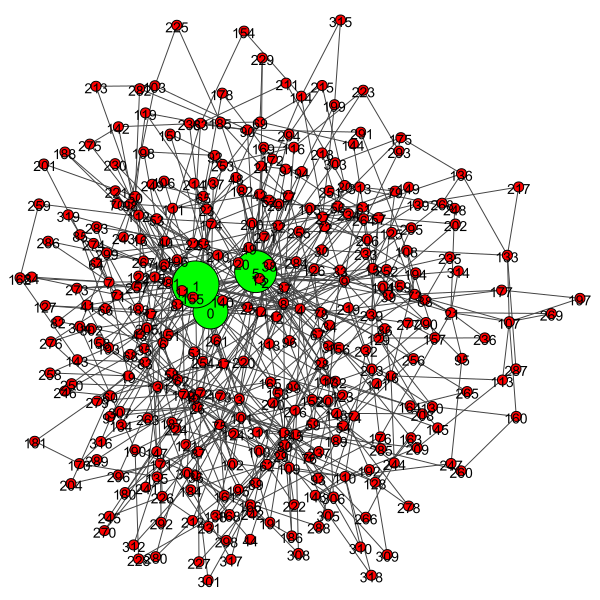

In [10]:

# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]
node_data=normalize_node_data(node_data)
gds.show_nodes(node_data)
ig.plot(gds.G,vertex_label=gds.G.vs["node_id"])


15 关联节点: {'0': 0.03228763545330998, '2': 0.023141787026849835, '4': 0.018803917574316445, '8': 0.017521829805377954, '26': 0.022183187612375914, '1': 0.044670775315353184, '5': 0.03971884804026435, '15': 0.026990689212981575, '18': 0.023933132533763665}
[0, 2, 4, 8, 26, 1, 5, 15, 18]
19 关联节点: {'0': 0.06549474774482059, '2': 0.037803390531908995, '4': 0.023466381277062687, '8': 0.02194563148220583, '26': 0.030581915819167107, '1': 0.10026105882260936, '5': 0.08599932694057405, '9': 0.017381615275924838, '13': 0.017219361493545995, '6': 0.018091996293393427, '15': 0.04412418325878175, '18': 0.0372564865922565}
[0, 2, 4, 8, 26, 1, 5, 9, 13, 6, 15, 18]
[0, 1, 2, 4, 5, 6, 8, 9, 13, 15, 18, 26]


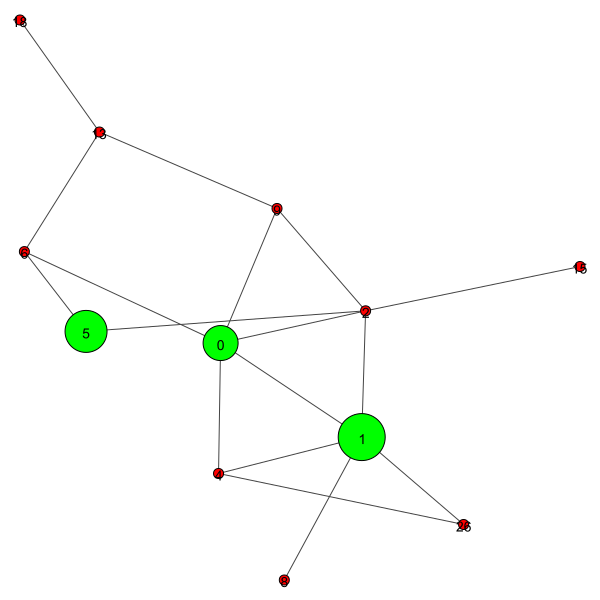

In [11]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','19']

# gds.FADE=0.1
# gds.LIMIT=0.002
result_node =[]
for node in selected_nodes:
    # 执行传播
    for _ in range(6): 
        gds.add_one_node_ids([node])
        gds.emit_to_buffer()
        gds.merge_from_buffer()


    # 计算中心节点
    central_nodes = gds.show_central()
    print(node,"关联节点:", central_nodes)


    # 可视化
    node_data = [(node_id, score) for node_id, score in central_nodes.items()]


    nodes_vids =[gds.nodeid_id_dict[i[0]] for i in node_data]
    print(nodes_vids)
    result_node.extend(nodes_vids)
result_node=list(set(result_node))
black_subgraph =gds.G.subgraph(result_node)
print(result_node)
ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])


In [12]:
len(result_node)

12